# GR5291 Final Project

## Group Member: Ares Wang(yw3626), Gexin Chen(gc2936), Zixuan Liu(zl3055)

In [1]:
import timeit
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from scipy.stats import chi2_contingency
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from mlxtend.plotting import plot_decision_regions
from sklearn.cluster import KMeans
from dtreeviz.trees import dtreeviz
from sklearn.linear_model import LinearRegression
import pylab 
import scipy.stats as stats

In [2]:
train_data = pd.read_csv('../data/train.csv',index_col=0)
test_data = pd.read_csv('../data/test.csv', index_col=0)

In [3]:
import warnings
warnings.filterwarnings('ignore')

# 1. Exploratory Data Analysis

In [4]:
# Get the size of data
print(train_data.shape,test_data.shape)

(103904, 24) (25976, 24)


In [5]:
# Combine two datasets for EDA
data = pd.concat([train_data, test_data],ignore_index = True)

data

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
129876,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
129877,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
129878,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


In [6]:
# Obtain the summary statistics of the variables
data.describe().T
#test_data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,129880.0,64940.500000,37493.270818,1.0,32470.75,64940.5,97410.25,129880.0
Age,129880.0,39.427957,15.119360,7.0,27.00,40.0,51.00,85.0
Flight Distance,129880.0,1190.316392,997.452477,31.0,414.00,844.0,1744.00,4983.0
Inflight wifi service,129880.0,2.728696,1.329340,0.0,2.00,3.0,4.00,5.0
Departure/Arrival time convenient,129880.0,3.057599,1.526741,0.0,2.00,3.0,4.00,5.0
Ease of Online booking,129880.0,2.756876,1.401740,0.0,2.00,3.0,4.00,5.0
Gate location,129880.0,2.976925,1.278520,0.0,2.00,3.0,4.00,5.0
Food and drink,129880.0,3.204774,1.329933,0.0,2.00,3.0,4.00,5.0
Online boarding,129880.0,3.252633,1.350719,0.0,2.00,3.0,4.00,5.0
Seat comfort,129880.0,3.441361,1.319289,0.0,2.00,4.0,5.00,5.0


In [7]:
data.loc[data['Arrival Delay in Minutes'] == 1584]

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
83741,73471,Female,Loyal Customer,47,Personal Travel,Eco,1120,2,2,2,...,2,4,4,4,2,3,2,1592,1584.0,neutral or dissatisfied


In [8]:
# Return the data types
data.dtypes
#test_data.dtypes

id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival De

In [9]:
# Check Missing Values
data.isna().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction                           0
dtype: int64

We can see that there exists missing value for feature [Arrival Delay in Minutes]. It is probably because that some questionaires is taken during the flight, so the value of Arrival Delay is not known. 
Therefore, we decide to remove missing values because there is no reasonable estimate for unknown values.

In [10]:
# NAs in Arrival Delay in Minutes
train_data.dropna(subset=['Arrival Delay in Minutes'],inplace=True)
test_data.dropna(subset=['Arrival Delay in Minutes'],inplace=True)
data.dropna(subset=['Arrival Delay in Minutes'],inplace=True)

In [11]:
# keep a copy for the original dataset 
train_data1 = train_data.copy()
test_data1 = test_data.copy()

44897
58697
11365
14528


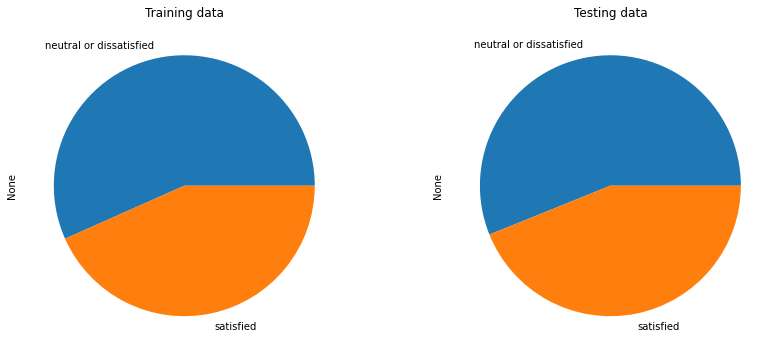

In [12]:
# Find the distribution of the target variable
fig,ax=plt.subplots(1,2,figsize=(14,6))
train_data.groupby('satisfaction').size().plot(kind='pie',ax=ax[0])
ax[0].set_title('Training data')
test_data.groupby('satisfaction').size().plot(kind='pie',ax=ax[1])
ax[1].set_title('Testing data')
print(train_data[train_data['satisfaction']=='satisfied'].shape[0])
print(train_data[train_data['satisfaction']=='neutral or dissatisfied'].shape[0])
print(test_data[test_data['satisfaction']=='satisfied'].shape[0])
print(test_data[test_data['satisfaction']=='neutral or dissatisfied'].shape[0])

Text(0.5, 1.0, 'Flight Distance Distribution Plot')

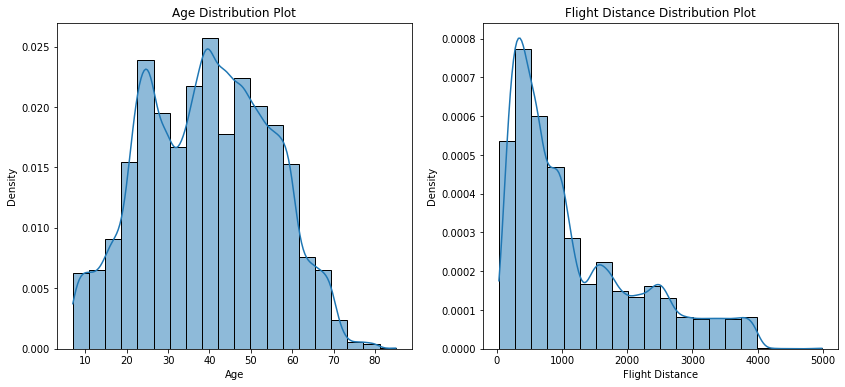

In [13]:
# Visualize numerical variables
fig,ax=plt.subplots(1,2,figsize=(14,6))
sns.histplot(x='Age',data=data,ax=ax[0],kde=True,bins=20,stat='density')
sns.histplot(x='Flight Distance',data=data,ax=ax[1],kde=True,bins=20,stat='density')
ax[0].set_title("Age Distribution Plot")
ax[1].set_title("Flight Distance Distribution Plot")

Text(0.5, 0, 'Log Arrival Delay in Minutes')

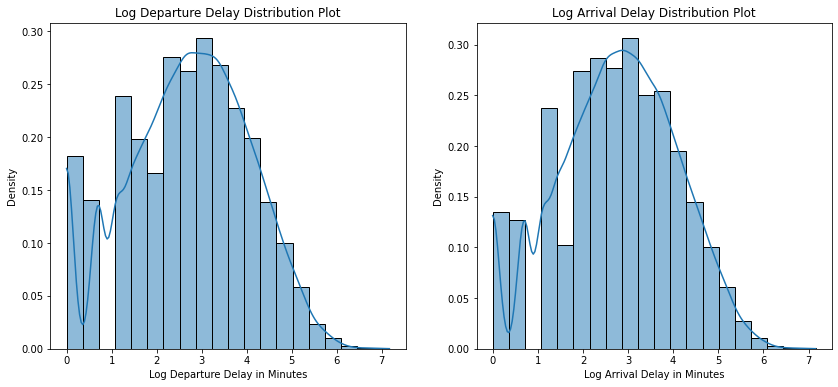

In [14]:
dataz = data[data["Arrival Delay in Minutes"] != 1584]
dataz["Arrival Delay in Minutes"] = np.log(dataz["Arrival Delay in Minutes"])
dataz["Departure Delay in Minutes"] = np.log(dataz["Departure Delay in Minutes"])
# Visualize numerical variables
fig,ax=plt.subplots(1,2,figsize=(14,6))

sns.histplot(x='Departure Delay in Minutes',data=dataz,ax=ax[0],kde=True,bins=20,stat='density')
sns.histplot(x='Arrival Delay in Minutes',data=dataz,ax=ax[1],kde=True,bins=20,stat='density')
ax[0].set_title("Log Departure Delay Distribution Plot")
ax[1].set_title("Log Arrival Delay Distribution Plot")
ax[0].set_xlabel("Log Departure Delay in Minutes")
ax[1].set_xlabel("Log Arrival Delay in Minutes")

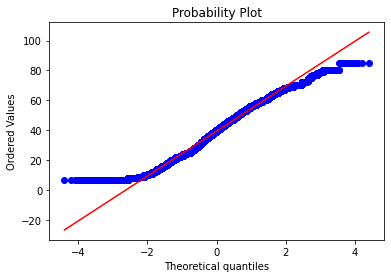

In [15]:
stats.probplot(data['Age'], dist="norm", plot=pylab)
pylab.show()

In [16]:
stats.kstest(data['Age'], 'norm')

KstestResult(statistic=0.9999999999987201, pvalue=0.0)

In [17]:
# Measure the skewness and kurtosis
#print(data['Age'].agg(['skew','kurtosis']))
#print(data['Flight Distance'].agg(['skew','kurtosis']))

<AxesSubplot:xlabel='Class', ylabel='count'>

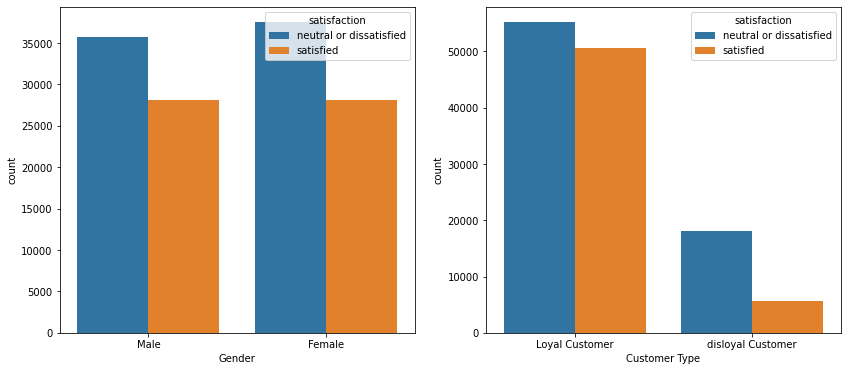

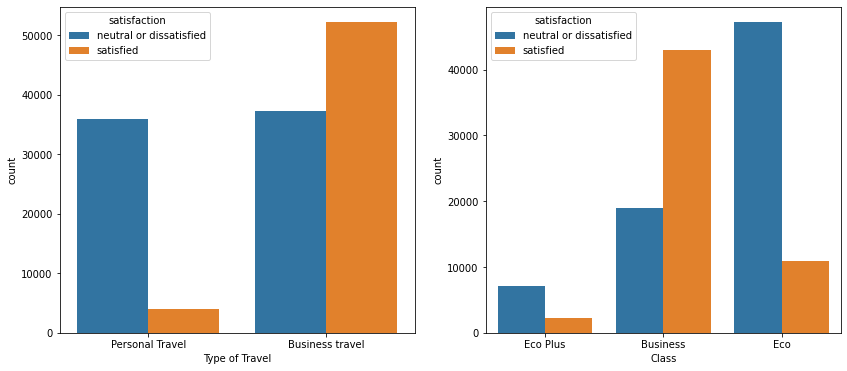

In [18]:
# Visualize categorical variables
fig,ax=plt.subplots(1,2,figsize=(14,6))
sns.countplot(x='Gender',hue='satisfaction',data=data,ax=ax[0])
sns.countplot(x='Customer Type',hue='satisfaction',data=data,ax=ax[1])
fig,ax=plt.subplots(1,2,figsize=(14,6))
sns.countplot(x='Type of Travel',hue='satisfaction',data=data,ax=ax[0])
sns.countplot(x='Class',hue='satisfaction',data=data,ax=ax[1])

In [19]:
# Transfer String Variables to Categorical Variables
# Gender(0 for Female,1 for Male)
le1 = LabelEncoder()
train_data.Gender = le1.fit_transform(train_data.Gender)
test_data.Gender = le1.transform(test_data.Gender)

# Customer Type(0 for disloyal Customer, 1 for Loyal Customer)
train_data['Customer Type'].replace(['disloyal Customer', 'Loyal Customer'], [0, 1], inplace=True)
test_data['Customer Type'].replace(['disloyal Customer', 'Loyal Customer'], [0, 1], inplace=True)

# Type of Travel(0 for Personal travel, 1 for Business Travel)
train_data['Type of Travel'].replace(['Personal Travel', 'Business travel'], [0, 1], inplace=True)
test_data['Type of Travel'].replace(['Personal Travel', 'Business travel'], [0, 1], inplace=True)

# Class(0 for Eco, 1 for Eco Plus, 2 for Business)
train_data['Class'].replace(['Eco', 'Eco Plus', 'Business'], [0, 1, 2], inplace=True)
test_data['Class'].replace(['Eco', 'Eco Plus', 'Business'], [0, 1, 2], inplace=True)

# Satisifaction (0 for 'Neutral or Unsatisfied'; 1 for 'Satisfied')
train_data['satisfaction'].replace(['neutral or dissatisfied', 'satisfied'], [0, 1], inplace=True)
test_data['satisfaction'].replace(['neutral or dissatisfied', 'satisfied'], [0, 1], inplace=True)

#Save this data for later machine learning process
X_train_ml,y_train_ml = StandardScaler().fit_transform(train_data.drop(['satisfaction'], axis=1)),train_data['satisfaction'].values
X_test_ml,y_test_ml = StandardScaler().fit_transform(test_data.drop(['satisfaction'], axis=1)),test_data['satisfaction'].values

In [20]:
# Combine two datasets for EDA
data_processed = pd.concat([train_data, test_data])
data_processed.reset_index(level=0, inplace=True)
data_processed.shape


(129487, 25)

<AxesSubplot:>

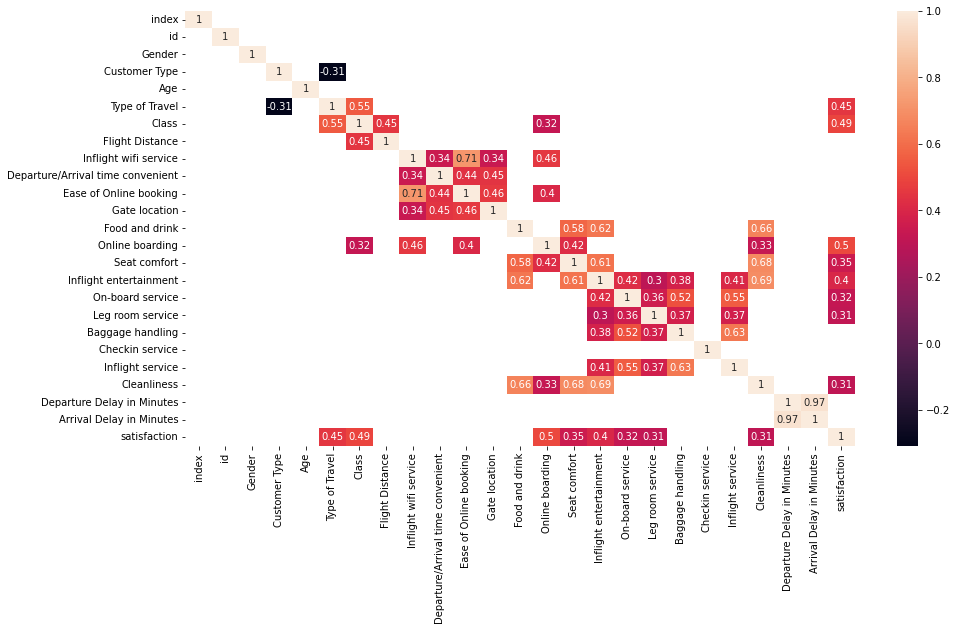

In [21]:
# Investigate Correlation Between Variables
data_corr = data_processed.corr()
plt.figure(figsize = (15,8))
sns.heatmap(data_corr[data_corr.abs() > 0.3], annot = True)

<AxesSubplot:>

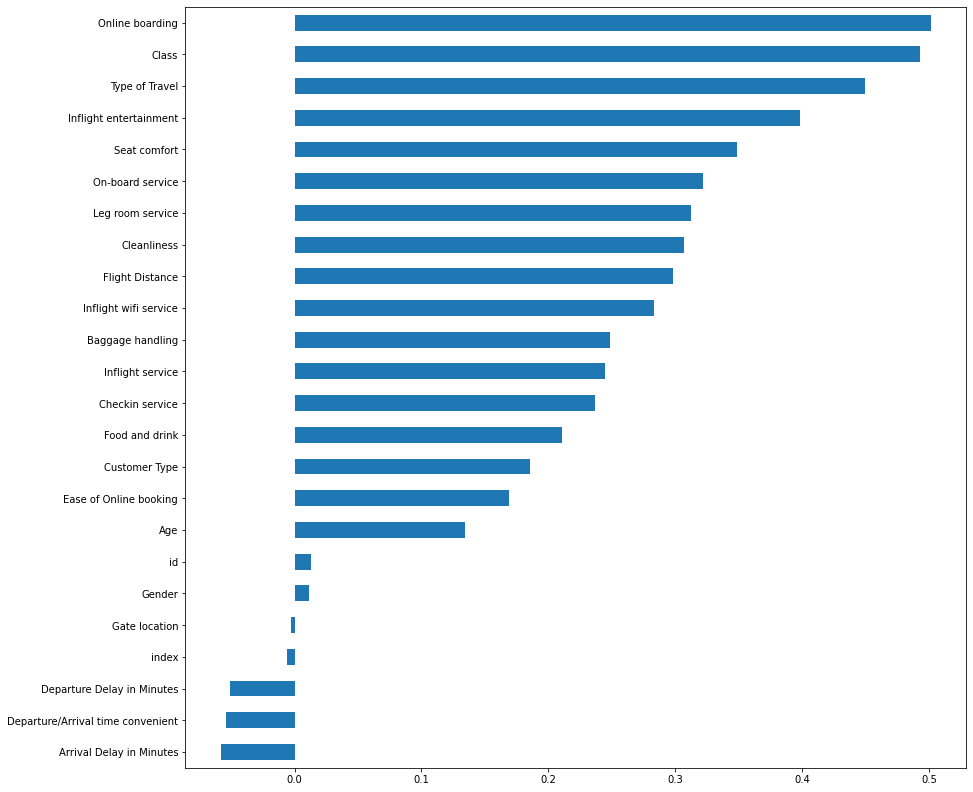

In [22]:
data_processed.corrwith(data_processed['satisfaction']) \
    .sort_values(ascending=True)[:-1] \
    .plot(kind='barh', figsize=(14, 14))

From above, it can be observed that several features are correlated with each others. We will investigate on some correlated features to gain some business insight.

It can be observed that output variable [satisfaction] is highly correlated with [Type of Travel], [Class], 

<AxesSubplot:xlabel='Type of Travel', ylabel='count'>

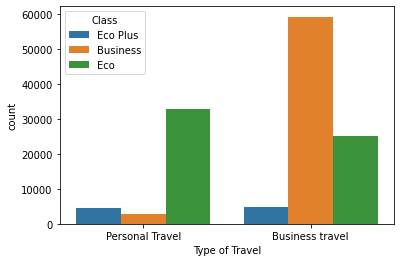

In [23]:
sns.countplot(x = data['Type of Travel'],hue = data['Class'])

In [24]:
stat, p, df, expected = chi2_contingency(pd.crosstab(data['Type of Travel'], data['Class']))
print("The test statistic is: {}, and corresponding p-value is: {}.".format(stat,p))

The test statistic is: 39751.14344158593, and corresponding p-value is: 0.0.


<AxesSubplot:xlabel='Class', ylabel='count'>

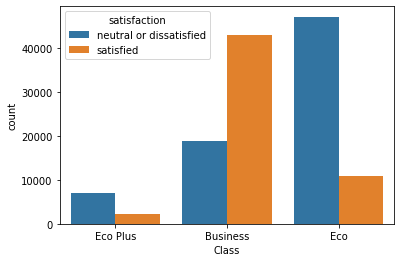

In [25]:
sns.countplot(x = data['Class'],hue = data['satisfaction'])

In [26]:
stat, p, df, expected = chi2_contingency(pd.crosstab(data['satisfaction'], data['Class']))
print("The test statistic is: {}, and corresponding p-value is: {}.".format(stat,p))

The test statistic is: 32823.12402964362, and corresponding p-value is: 0.0.


<AxesSubplot:xlabel='Type of Travel', ylabel='count'>

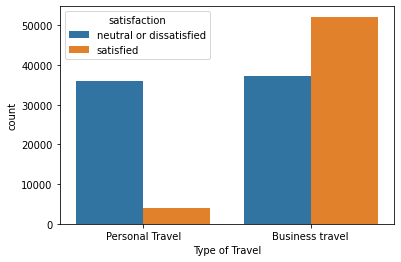

In [27]:
sns.countplot(x = data['Type of Travel'],hue = data['satisfaction'])

In [28]:
stat, p, df, expected = chi2_contingency(pd.crosstab(data['Type of Travel'], data['satisfaction']))
print("The test statistic is: {}, and corresponding p-value is: {}.".format(stat,p))

The test statistic is: 26195.13977467199, and corresponding p-value is: 0.0.


<AxesSubplot:xlabel='Customer Type', ylabel='count'>

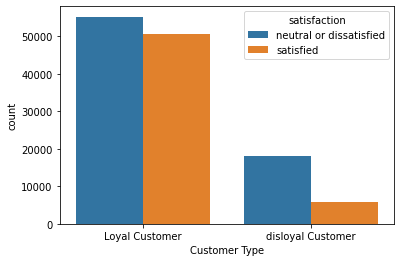

In [29]:
sns.countplot(x = data['Customer Type'],hue = data['satisfaction'])

In [30]:
stat, p, df, expected = chi2_contingency(pd.crosstab(data['Customer Type'], data['satisfaction']))
print("The test statistic is: {}, and corresponding p-value is: {}.".format(stat,p))

The test statistic is: 4475.155050825033, and corresponding p-value is: 0.0.


<font size = 3> From above plots and results from Chi-Squared test, we can find out that variables [Customer Type], [Type of Travel], [Class] is highly correlated with our output [satisfaction]. We want to further investigate the relationships among these variables by building interpretable models and visualize their decision rule.

<AxesSubplot:xlabel='Gender', ylabel='count'>

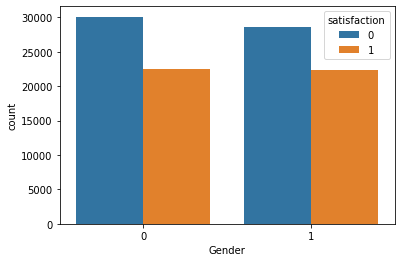

In [31]:
sns.countplot(x = train_data['Gender'],hue = train_data['satisfaction'])

In [32]:
stat, p, df, expected = chi2_contingency(pd.crosstab(train_data['Gender'], train_data['satisfaction']))
print("The test statistic is: {}, and corresponding p-value is: {}.".format(stat,p))

The test statistic is: 15.765917970126587, and corresponding p-value is: 7.168224693815838e-05.


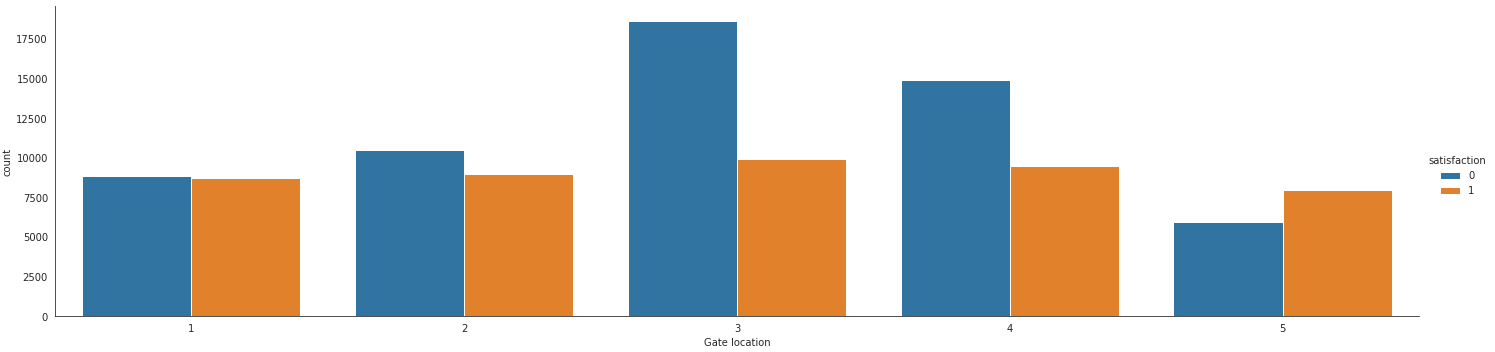

In [33]:
with sns.axes_style('white'):
    g = sns.catplot("Gate location", data=train_data, aspect=4.0, kind='count', hue='satisfaction', order=range(1,6))

In [34]:
stat, p, df, expected = chi2_contingency(pd.crosstab(train_data['Gate location'], train_data['satisfaction']))
print("The test statistic is: {}, and corresponding p-value is: {}.".format(stat,p))

The test statistic is: 2490.876118701092, and corresponding p-value is: 0.0.


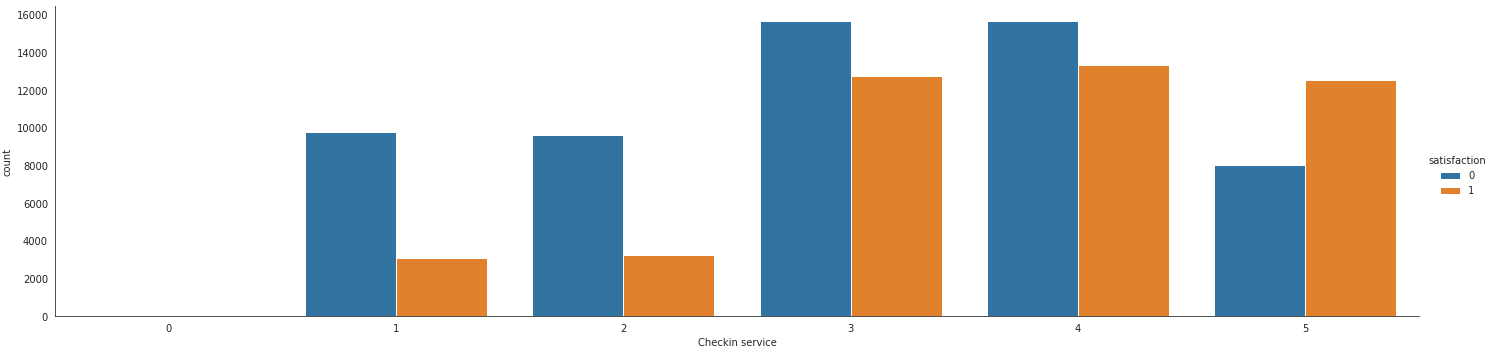

In [35]:
with sns.axes_style('white'):
    g = sns.catplot("Checkin service", data=train_data, aspect=4.0, kind='count', hue='satisfaction', order=range(0,6))

In [36]:
stat, p, df, expected = chi2_contingency(pd.crosstab(train_data['Checkin service'], train_data['satisfaction']))
print("The test statistic is: {}, and corresponding p-value is: {}.".format(stat,p))

The test statistic is: 6390.388016693831, and corresponding p-value is: 0.0.


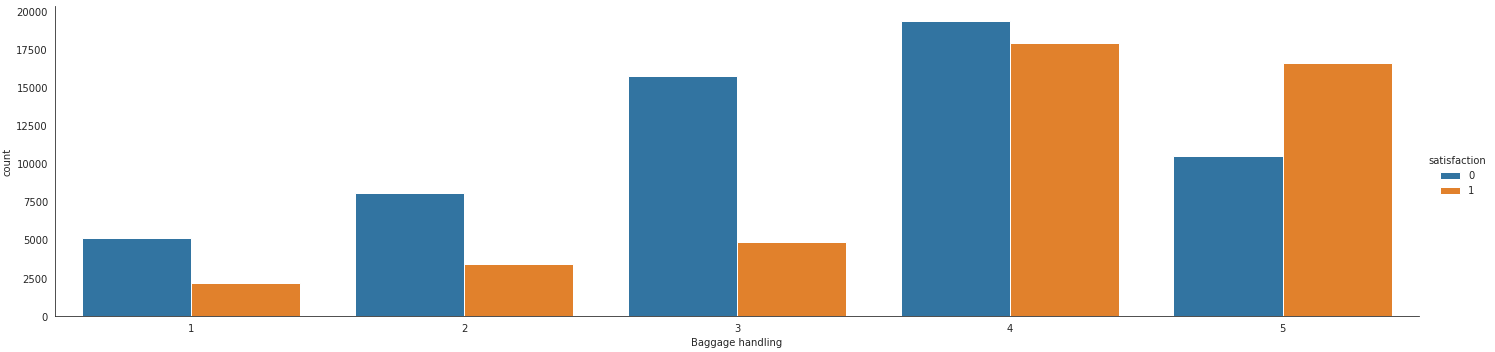

In [37]:
with sns.axes_style('white'):
    g = sns.catplot("Baggage handling", data=train_data, aspect=4.0, kind='count', hue='satisfaction', order=range(1,6))

In [38]:
stat, p, df, expected = chi2_contingency(pd.crosstab(train_data['Baggage handling'], train_data['satisfaction']))
print("The test statistic is: {}, and corresponding p-value is: {}.".format(stat,p))

The test statistic is: 8591.905811063301, and corresponding p-value is: 0.0.


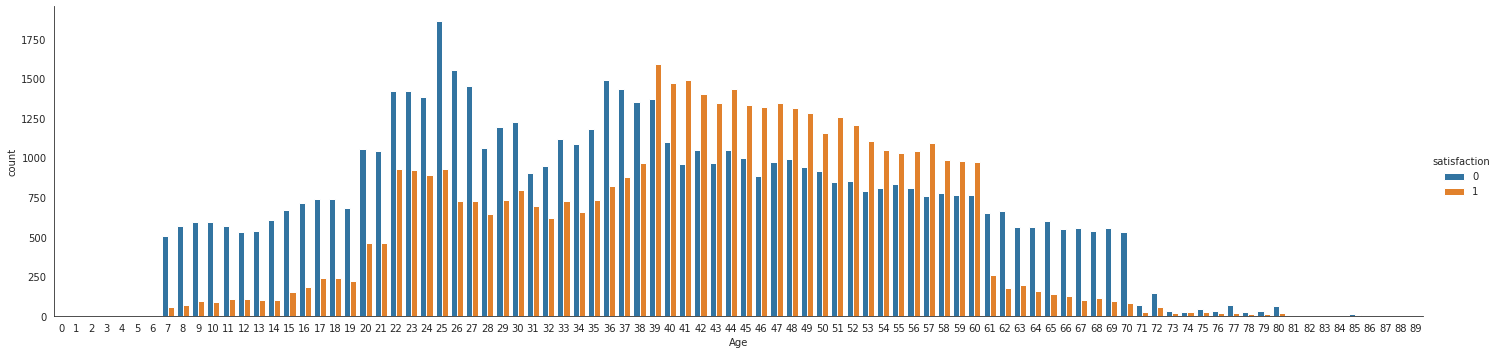

In [39]:
with sns.axes_style('white'):
    g = sns.catplot("Age", data=train_data, aspect=4.0, kind='count', hue='satisfaction', order=range(0, 90))

In [40]:
stat, p, df, expected = chi2_contingency(pd.crosstab(train_data['Age'], train_data['satisfaction']))
print("The test statistic is: {}, and corresponding p-value is: {}.".format(stat,p))

The test statistic is: 9077.186441558515, and corresponding p-value is: 0.0.


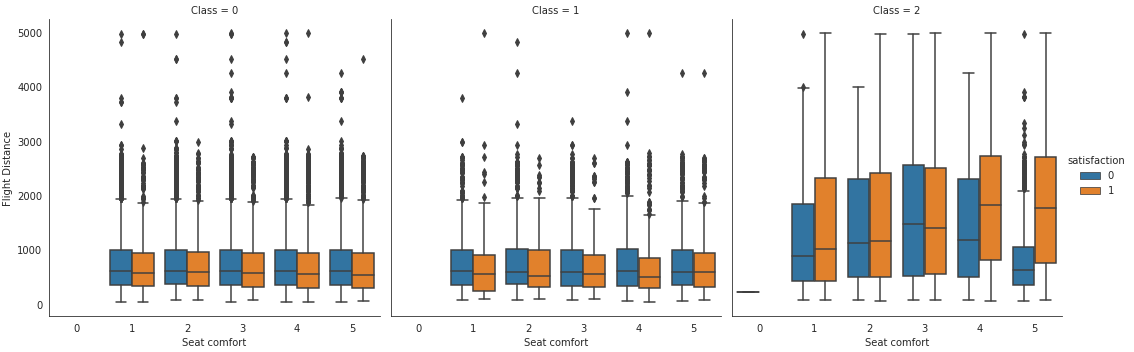

In [41]:
with sns.axes_style('white'):
    g = sns.catplot(x="Seat comfort", y="Flight Distance", hue="satisfaction", col="Class", data=train_data, kind="box", height=5, aspect=1)

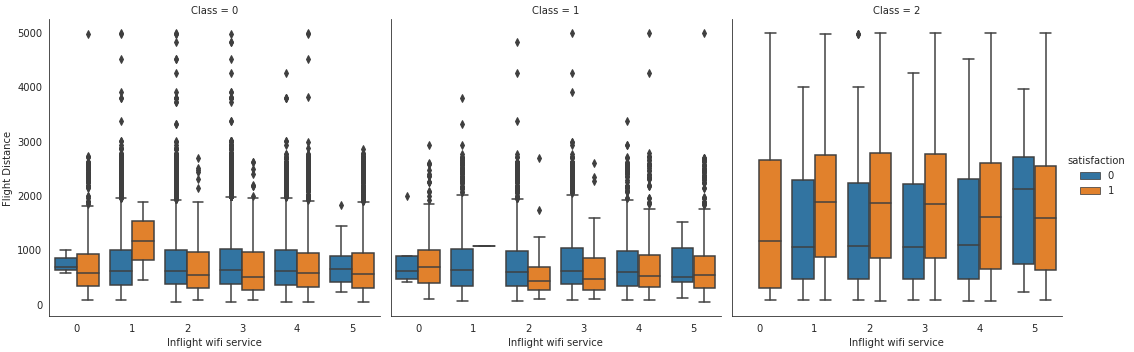

In [42]:
with sns.axes_style('white'):
    g = sns.catplot(x="Inflight wifi service", y="Flight Distance", hue="satisfaction", col="Class", data=train_data, kind="box", height=5, aspect=1)

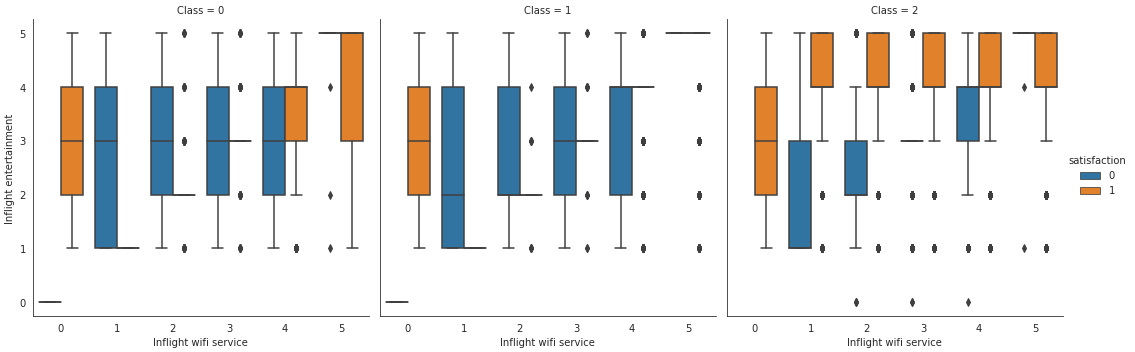

In [43]:
with sns.axes_style('white'):
    g = sns.catplot(x="Inflight wifi service", y="Inflight entertainment", hue="satisfaction", col="Class", data=train_data, kind="box", height=5, aspect=1)

In [44]:
# Initialize Variables
y_train = train_data['satisfaction'].astype(np.int_)
y_test = test_data['satisfaction'].astype(np.int_)
X_train = train_data[['Customer Type', 'Type of Travel', 'Class']]
X_test = test_data[['Customer Type', 'Type of Travel', 'Class']]

In [45]:
dt_model=DecisionTreeClassifier(random_state=20,min_samples_split=10,min_samples_leaf=14,max_depth=20)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=20, min_samples_leaf=14, min_samples_split=10,
                       random_state=20)

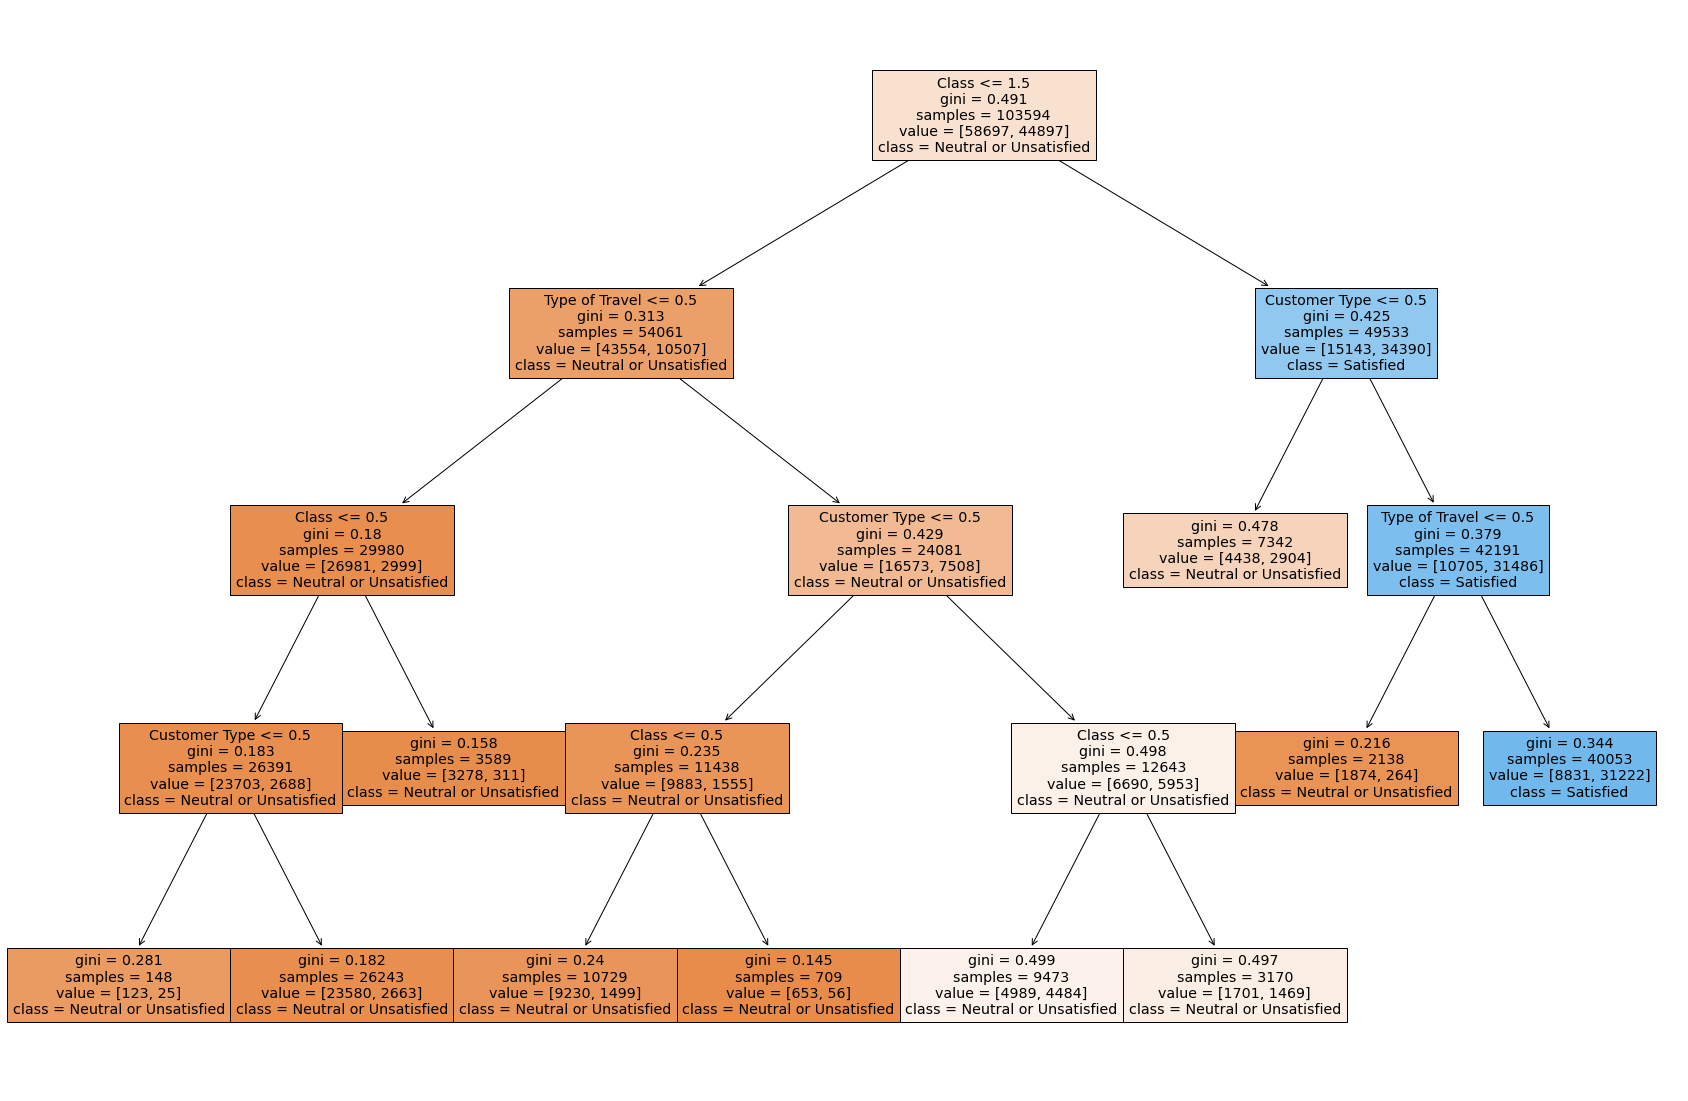

In [46]:
plt.figure(figsize = (30,20))
_ = tree.plot_tree(dt_model, 
                   feature_names=["Customer Type", 'Type of Travel', 'Class'],  
                   class_names=['Neutral or Unsatisfied', 'Satisfied'],
                   filled=True)


<font size = 3> From correlation heatmap above, we can see that [Online Boarding], [Seat Comfort], [Inflight Entertainment], [On-board Service], [Leg Room Service], [Cleanliness] are the most important factors for customer. Under the assumption that different subgroups of customers care about different factors of flight experience, we can build a cluster algorithm and analyze which aspects of experience is more important for different subgroups of customer.

In [47]:
km_model = KMeans(n_clusters = 4).fit(X_train)

In [48]:
def group_by(df,index):
    result = df.groupby(index).mean()
    
    # Drop Unimportant Features
    result = result.drop(columns = ['Gender','id'])

    # Data Normalization
    result['Flight Distance'] = scale(result['Flight Distance'])
    result['Age'] = scale(result['Age'])
    result['Departure Delay in Minutes'] = scale(result['Departure Delay in Minutes'])
    result['Arrival Delay in Minutes'] = scale(result['Arrival Delay in Minutes'])
    return result

In [49]:
train_data['cluster_labels'] = km_model.predict(X_train)
mean_by_group = group_by(train_data, 'cluster_labels')
mean_by_group

,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
cluster_labels,,,,,,,,,,,,,,,,,,,,,
0,0.540946,-0.357174,1.000000,0.135632,-0.705108,2.910791,2.650522,2.796851,3.036069,3.114795,...,3.153431,2.900565,3.066490,3.248246,2.823378,3.250043,3.093959,1.646523,1.659792,0.318843
1,0.000000,-1.288287,0.998634,1.911936,-0.535307,2.885977,2.505527,2.869457,2.915538,3.037635,...,3.059868,3.628121,3.402062,4.125947,3.633089,4.129549,3.048938,-1.048098,-1.018985,0.367656
2,1.000000,1.478082,0.949326,2.000000,1.726317,2.748762,2.971724,2.914674,2.998270,3.372473,...,3.735157,3.673532,3.681306,3.776990,3.484938,3.778294,3.552487,-0.223732,-0.347265,0.746273
3,0.994930,0.167379,0.000000,0.119713,-0.485902,2.519913,3.652635,2.473783,2.917612,3.074650,...,3.067945,3.283055,3.095630,3.593396,3.336791,3.620547,3.125717,-0.374693,-0.293542,0.100033


From above, we can find out that the four clusters can be described as:  
0: Loyal Business Traveller taking Business Class;  
1: Loyal Personal Traveller taking Eco or Eco Plus;  
2: Disloyal Business Traveller taking Eco or Eco Plus;  
3: Loyal Business Traveller taking Eco or Eco Plus

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

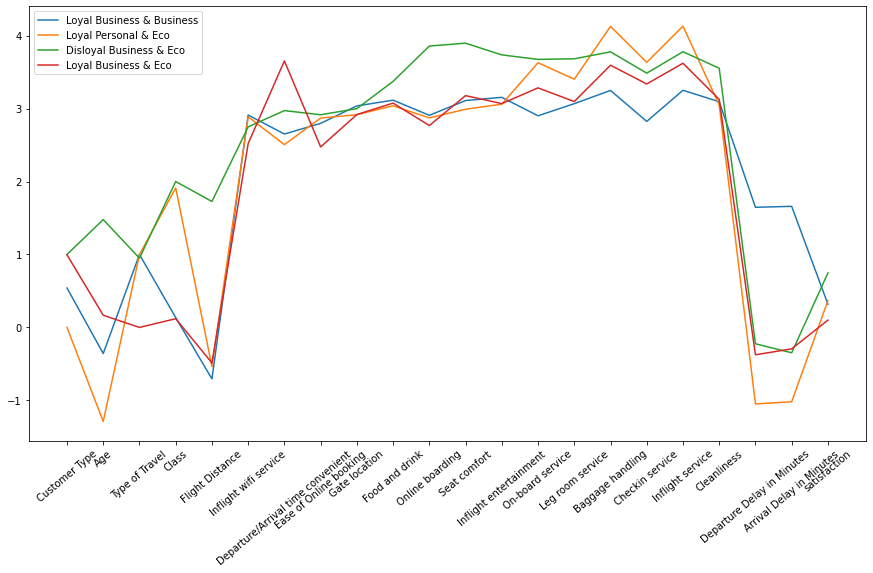

In [50]:
plt.figure(figsize = (15,8))
plt.plot(mean_by_group.columns, mean_by_group.loc[0], label = 'Loyal Business & Business')
plt.plot(mean_by_group.columns, mean_by_group.loc[1], label = 'Loyal Personal & Eco')
plt.plot(mean_by_group.columns, mean_by_group.loc[2], label = 'Disloyal Business & Eco')
plt.plot(mean_by_group.columns, mean_by_group.loc[3], label = 'Loyal Business & Eco')
plt.legend()
plt.xticks(rotation = 40)

In [51]:
mean_by_class = group_by(train_data, 'Class')
mean_by_class

,Customer Type,Age,Type of Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,cluster_labels
Class,,,,,,,,,,,,,,,,,,,,,
0,0.766553,-1.074505,0.433584,-0.711206,2.675316,3.199043,2.605091,2.972228,3.086451,2.812933,...,3.120834,3.086129,3.450153,3.122250,3.464791,3.108278,0.409915,0.354799,0.186101,1.699247
1,0.904526,-0.259039,0.519416,-0.703000,2.767809,3.216256,2.662694,2.967059,3.123192,2.890198,...,3.045929,3.061328,3.363953,3.016470,3.387654,3.130557,0.967210,1.008175,0.245849,1.536690
2,0.851776,1.333544,0.956615,1.414206,2.775221,2.905820,2.914077,2.983042,3.322835,3.716411,...,3.679608,3.644661,3.842812,3.518987,3.844447,3.477439,-1.377125,-1.362975,0.694285,1.851776


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

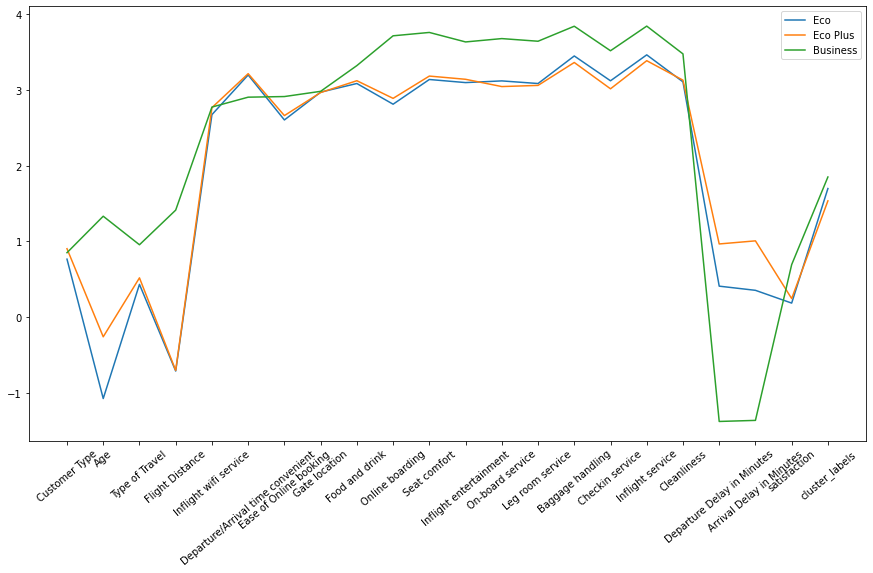

In [52]:
plt.figure(figsize = (15,8))
plt.plot(mean_by_class.columns, mean_by_class.loc[0], label = 'Eco')
plt.plot(mean_by_class.columns, mean_by_class.loc[1], label = 'Eco Plus')
plt.plot(mean_by_class.columns, mean_by_class.loc[2], label = 'Business')
plt.legend()
plt.xticks(rotation = 40)

In [53]:
mean_by_customertype = group_by(train_data, 'Customer Type')
mean_by_customertype

,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,cluster_labels
Customer Type,,,,,,,,,,,,,,,,,,,,,
0,-1.0,0.991390,0.813279,-1.0,2.708113,2.392404,2.698922,2.994031,3.034703,2.709804,...,3.229030,3.218413,3.693852,3.218519,3.698077,3.053983,1.0,1.0,0.236848,0.449345
1,1.0,0.622428,1.076481,1.0,2.734592,3.209386,2.769968,2.973223,3.239564,3.371406,...,3.416952,3.381139,3.617786,3.323510,3.627944,3.338369,-1.0,-1.0,0.477345,2.053649


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

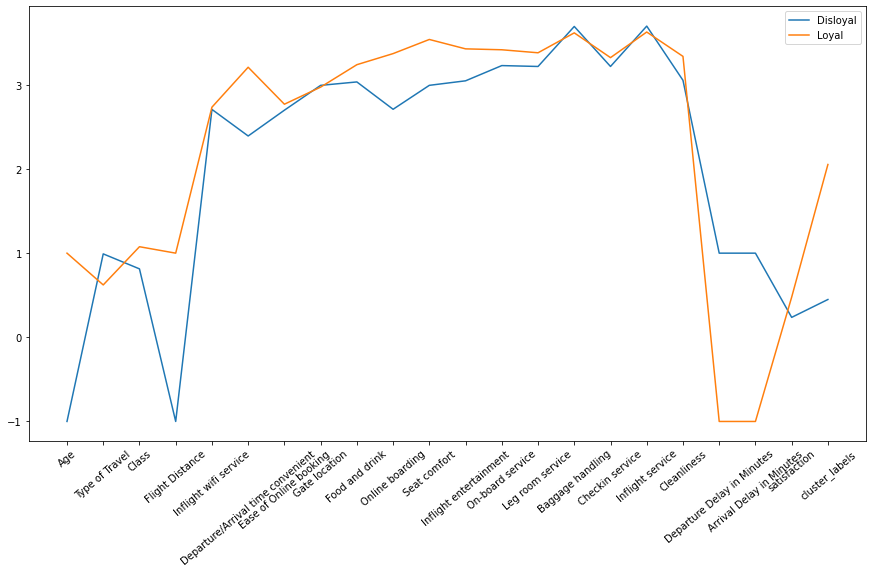

In [54]:
plt.figure(figsize = (15,8))
plt.plot(mean_by_customertype.columns, mean_by_customertype.loc[0], label = 'Disloyal')
plt.plot(mean_by_customertype.columns, mean_by_customertype.loc[1], label = 'Loyal')
plt.legend()
plt.xticks(rotation = 40)

In [55]:
mean_by_purpose = group_by(train_data, 'Type of Travel')
mean_by_purpose

,Customer Type,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,cluster_labels
Type of Travel,,,,,,,,,,,,,,,,,,,,,
0,0.994927,-1.0,0.245479,-1.0,2.522052,3.651125,2.478664,2.918329,3.076971,2.798438,...,3.274114,3.079336,3.576457,3.336487,3.601326,3.132248,-1.0,-1.0,0.101559,2.932771
1,0.737368,1.0,1.380354,1.0,2.823130,2.794361,2.882110,3.003414,3.258392,3.453733,...,3.431386,3.473714,3.656517,3.289862,3.658490,3.355699,1.0,1.0,0.582579,1.233415


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

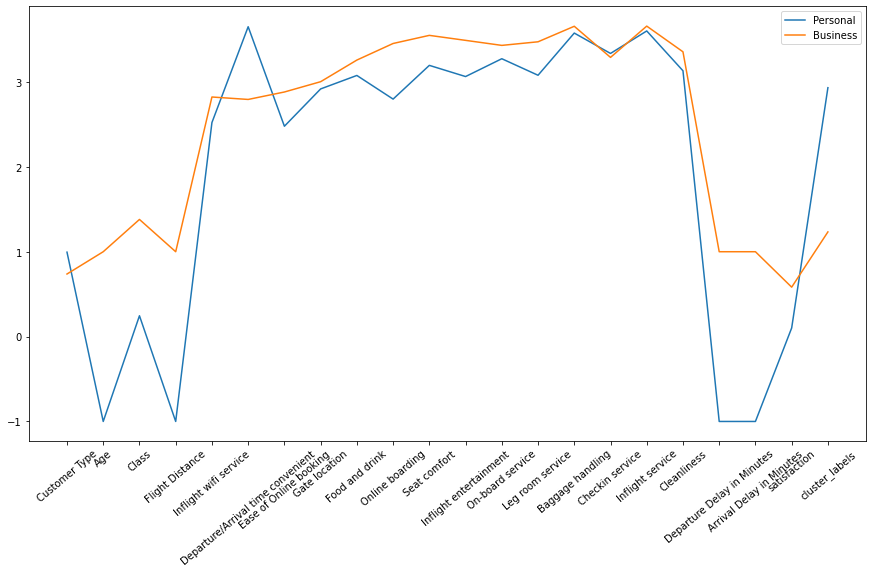

In [56]:
plt.figure(figsize = (15,8))
plt.plot(mean_by_purpose.columns, mean_by_purpose.loc[0], label = 'Personal')
plt.plot(mean_by_purpose.columns, mean_by_purpose.loc[1], label = 'Business')
plt.legend()
plt.xticks(rotation = 40)

# 2. Machine Learning Implementation

## 2.1 Traditional Machine Learning (Logistic, KNN, Decision Tree, SVM)

In [57]:
X_train = X_train_ml
y_train = y_train_ml
X_test = X_test_ml
y_test = y_test_ml

In [58]:
#Logistic Regression
start = timeit.default_timer()
#params = {'C':[0.01,0.1,1,10], 'penalty':['l1', 'l2', 'elasticnet']}
#gscv = GridSearchCV(LogisticRegression(),params,refit=True)
#gscv.fit(X_train,y_train)
#print(gscv.best_estimator_)#C=0.01
#grid_predictions = gscv.predict(X_test)
#print(confusion_matrix(y_test,grid_predictions))
#print(classification_report(y_test,grid_predictions))
LR=LogisticRegression(tol=1e-3,C=0.01)
LR.fit(X_train,y_train)
err_lr=1-LR.score(X_test,y_test)
#print(err_lr)
stop = timeit.default_timer()
time_lr=stop-start
print('The time to train data with Logistic Regression is ', time_lr, 'seconds')

The time to train data with Logistic Regression is  0.23393939999999702 seconds


In [59]:
#KNN with best hyperparameter n_neighbors=9
start = timeit.default_timer()
KNN=KNeighborsClassifier()
#params = {'n_neighbors':list(range(8,11))}
#gscv = GridSearchCV(KNN,params,refit=True)
#gscv.fit(X_train,y_train)
#print(gscv.best_estimator_)#n=9

KNN=KNeighborsClassifier(n_neighbors=9)
KNN.fit(X_train,y_train)
err_knn=1-KNN.score(X_test,y_test)
stop = timeit.default_timer()
time_knn=stop-start
print('The time to train data with KNN is ', time_knn, 'seconds')

The time to train data with KNN is  45.8696903 seconds


In [60]:
#Decision Tree
start = timeit.default_timer()
#params = {'min_samples_split': list(range(2,30,2)),'min_samples_leaf':list(range(10,30,2)),'max_depth':list(range(5,50,5))}
#gscv = GridSearchCV(DecisionTreeClassifier(random_state=20,min_samples_leaf=14),params)
#gscv.fit(X_train,y_train)
#print(gscv.best_estimator_)#DecisionTreeClassifier(random_state=20,min_samples_split=10,min_samples_leaf=14,max_depth=20)
DTC=DecisionTreeClassifier(random_state=20,min_samples_split=10,min_samples_leaf=14,max_depth=20)
DTC.fit(X_train,y_train)
err_dtc=1-DTC.score(X_test,y_test)
#print(err_dtc)
stop = timeit.default_timer()
time_dtc=stop-start
print('The time to train data with Decision Tree is ', time_dtc, 'seconds')

The time to train data with Decision Tree is  0.49117230000000234 seconds


In [61]:
#SVM with gaussian kernel
start = timeit.default_timer()
SVM=SVC(kernel='rbf',C=3)
SVM.fit(X_train,y_train)
err_svm=1-SVM.score(X_test,y_test)
#print(err_svm)
stop = timeit.default_timer()
time_svm=stop-start
print('The time to train data with SVM is ', time_svm, 'seconds')

The time to train data with SVM is  189.2319122 seconds


In [62]:
#test errors for above 4 classifiers
print('The error of Logistic Regression is %2f'%(err_lr*100)+'%', 'and the running time is %3fs.'%(time_lr))
print('The error of KNN is %2f'%(err_knn*100)+'%','and the running time is %3fs.'%(time_knn))
print('The error of Decision Tree is %2f'%(err_dtc*100)+'%','and the running time is %3fs.'%(time_dtc))
print('The error of SVM is %2f'%(err_svm*100)+'%','and the running time is %3fs.'%(time_svm))

The error of Logistic Regression is 12.775654% and the running time is 0.233939s.
The error of KNN is 6.990306% and the running time is 45.869690s.
The error of Decision Tree is 4.920249% and the running time is 0.491172s.
The error of SVM is 4.001081% and the running time is 189.231912s.


## 2.2 Deep Learning (DNN)

In [67]:
train_X = X_train_ml.reshape(-1,23)
train_y = y_train_ml
test_X = X_test_ml.reshape(-1,23)
test_y = y_test_ml

ohe = OneHotEncoder()
y_ohe = ohe.fit_transform(train_y.reshape(-1,1)).toarray()

train_X, val_X, train_y, val_y = train_test_split(train_X, y_ohe, test_size=0.2, stratify=y)
test_y_ohe = ohe.transform(test_y.reshape(-1,1)).toarray()

In [68]:
print(train_X.shape)
print(train_y.shape)
print(val_X.shape)
print(val_y.shape)
print(test_y.shape)

(82875, 23)
(82875, 2)
(20719, 23)
(20719, 2)
(25893,)


Epoch 1/10
648/648 [==============================] - 7s 7ms/step - loss: 0.1908 - accuracy: 0.9247 - val_loss: 0.1164 - val_accuracy: 0.9538
Epoch 2/10
648/648 [==============================] - 5s 7ms/step - loss: 0.1219 - accuracy: 0.9505 - val_loss: 0.1018 - val_accuracy: 0.9585
Epoch 3/10
648/648 [==============================] - 4s 7ms/step - loss: 0.1074 - accuracy: 0.9559 - val_loss: 0.0927 - val_accuracy: 0.9608
Epoch 4/10
648/648 [==============================] - 5s 7ms/step - loss: 0.1001 - accuracy: 0.9576 - val_loss: 0.0898 - val_accuracy: 0.9625
Epoch 5/10
648/648 [==============================] - 4s 7ms/step - loss: 0.0976 - accuracy: 0.9585 - val_loss: 0.0887 - val_accuracy: 0.9612
Epoch 6/10
648/648 [==============================] - 5s 7ms/step - loss: 0.0908 - accuracy: 0.9609 - val_loss: 0.0856 - val_accuracy: 0.9641
Epoch 7/10
648/648 [==============================] - 5s 7ms/step - loss: 0.0895 - accuracy: 0.9615 - val_loss: 0.0854 - val_accuracy: 0.9648
Epoch 

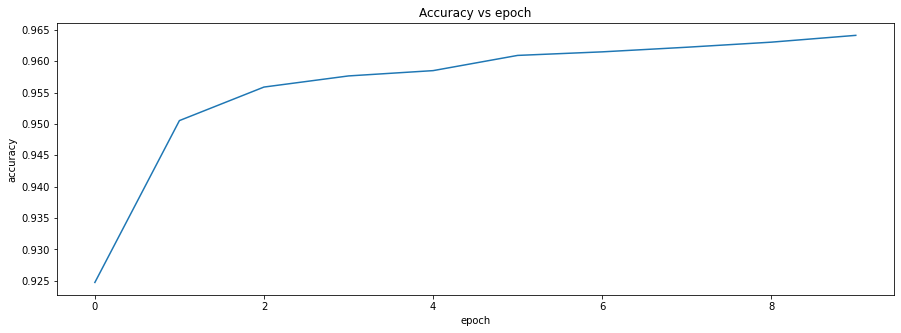

In [69]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
start = timeit.default_timer()
mymodel = Sequential()
mymodel.add(Dense(256, activation='relu', input_shape = (23,)))
mymodel.add(BatchNormalization())
mymodel.add(Dense(64, activation='relu'))
mymodel.add(BatchNormalization())
mymodel.add(Dense(16, activation='relu'))
mymodel.add(Dropout(0.1))
mymodel.add(Dense(2, activation='softmax'))
mymodel.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = mymodel.fit(train_X, train_y, validation_data=(val_X, val_y), epochs=10, shuffle=True,batch_size=128)
res=pd.DataFrame(history.history)
res['accuracy'].plot(figsize=(15,5))
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title("Accuracy vs epoch")
plt.show()
err_model = np.mean(mymodel.predict(test_X)!=test_y_ohe)

The misclassification error of CNN is 3.738462%.
The training time of NN is 50.464136s.


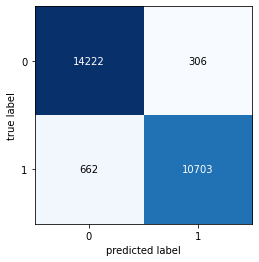

In [70]:
b = ohe.inverse_transform(mymodel.predict(test_X))
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
#c = ohe.inverse_transform(val_y)
cm = confusion_matrix(test_y, b)
plot_confusion_matrix(cm)
print('The misclassification error of CNN is %3f'%(100-(cm[0,0]+cm[1,1])/test_y.shape[0]*100)+'%.')
stop = timeit.default_timer()
print('The training time of NN is %3fs.'%(stop-start))

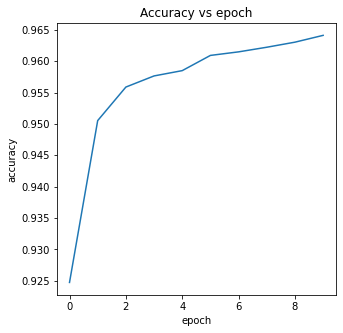

In [71]:
res['accuracy'].plot(figsize=(5,5))
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title("Accuracy vs epoch")
plt.show()

# 3. Recommendation Algorithm

In [72]:
data_tr = train_data1.copy()
data_te = test_data1.copy()
data_tr = data_tr.drop(['id'], axis=1)
data_te = data_te.drop(['id'], axis=1)

In [73]:
def age_tag(x):
    if x < 21:
        temp = 'Young'
    elif 21<= x < 50:
        temp = 'Adult'
    else:
        temp = 'Old'
    return temp

data_tr['Age_tag'] = data_tr.apply(lambda x: age_tag(x['Age']), axis=1)
data_te['Age_tag'] = data_te.apply(lambda x: age_tag(x['Age']), axis=1)

In [74]:
def flight_tag(x):
    if x <= 700:
        temp = 'Short'
    elif x <= 2000:
        temp = 'Medium'
    else:
        temp = 'Long'
    return temp 

data_tr['Dis_tag'] = data_tr.apply(lambda x: flight_tag(x['Flight Distance']), axis=1)
data_te['Dis_tag'] = data_te.apply(lambda x: flight_tag(x['Flight Distance']), axis=1)

In [75]:
a = data_tr.loc[:, ['Customer Type','Type of Travel', 'Class']].values
b=[]
for item in a:
    b.append('|'.join(item))
data_tr['Type'] = np.array(b)

In [76]:
np.unique(data_tr['Type'])

array(['Loyal Customer|Business travel|Business',
       'Loyal Customer|Business travel|Eco',
       'Loyal Customer|Business travel|Eco Plus',
       'Loyal Customer|Personal Travel|Business',
       'Loyal Customer|Personal Travel|Eco',
       'Loyal Customer|Personal Travel|Eco Plus',
       'disloyal Customer|Business travel|Business',
       'disloyal Customer|Business travel|Eco',
       'disloyal Customer|Business travel|Eco Plus',
       'disloyal Customer|Personal Travel|Business',
       'disloyal Customer|Personal Travel|Eco',
       'disloyal Customer|Personal Travel|Eco Plus'], dtype=object)

In [77]:
my_list = np.array(['Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness'])

my_list2 = ['Gender', 'Customer Type', 'Age_tag', 'Type of Travel', 'Class','Dis_tag']

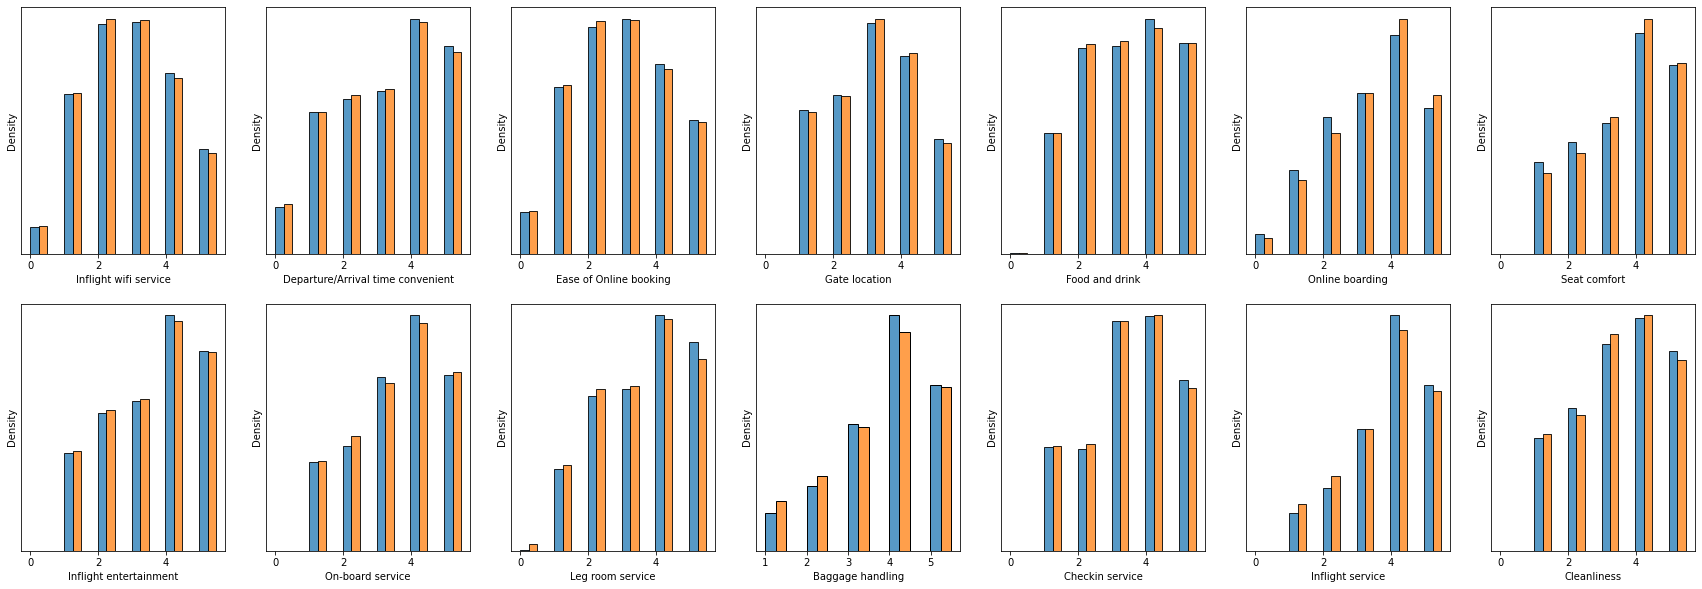

In [78]:
fig, ax = plt.subplots(2, 7, figsize=(30,10))
ax = ax.flatten()
for index, item in enumerate(my_list):
    sns.histplot(x=data_tr[item], hue=data_tr['Gender'], 
                 ax=ax[index], stat='density', multiple='dodge', 
                 binwidth=0.499,common_norm=False)
    ax[index].legend([],[], frameon=False)
    ax[index].set_yticks([])

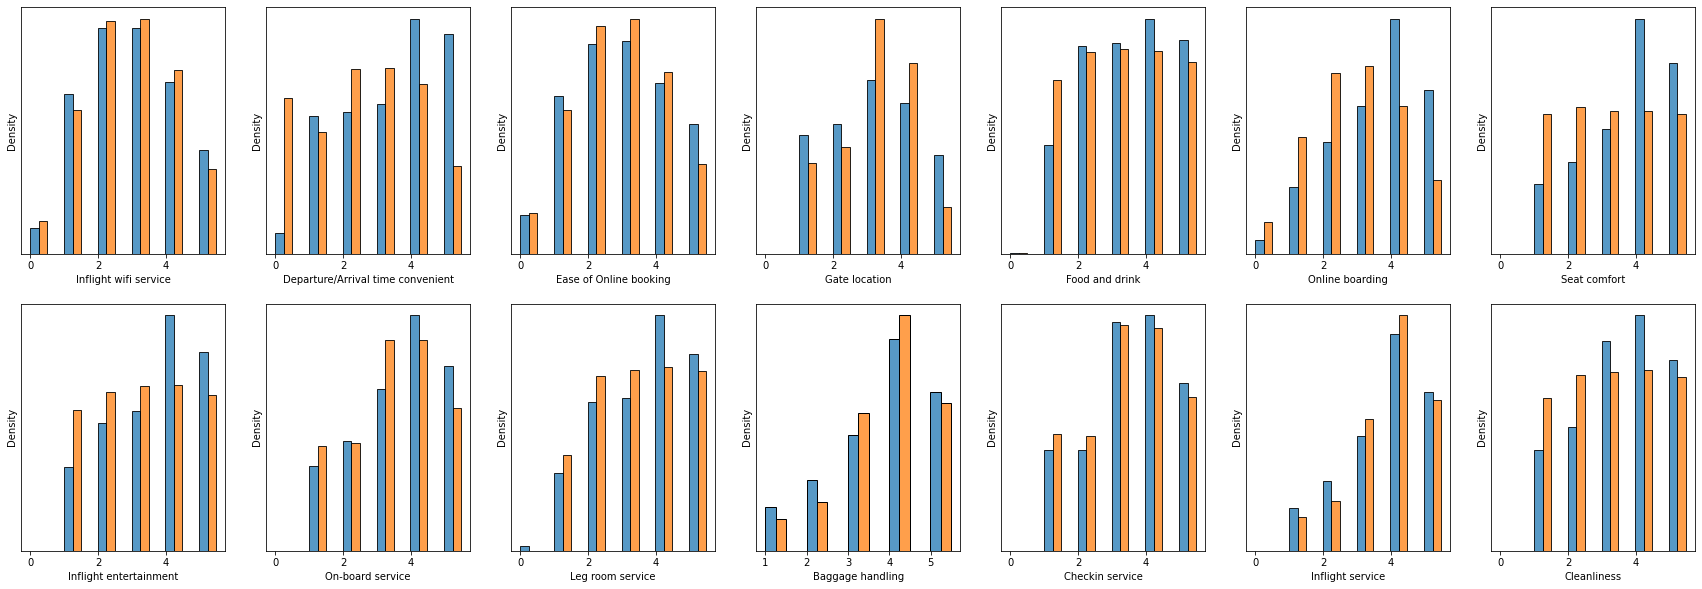

In [79]:
fig, ax = plt.subplots(2, 7, figsize=(30,10))
ax = ax.flatten()
for index, item in enumerate(my_list):
    sns.histplot(x=data_tr[item], hue=data_tr['Customer Type'], 
                 ax=ax[index], stat='density', multiple='dodge', 
                 binwidth=0.499,common_norm=False)
    ax[index].legend([],[], frameon=False)
    ax[index].set_yticks([])

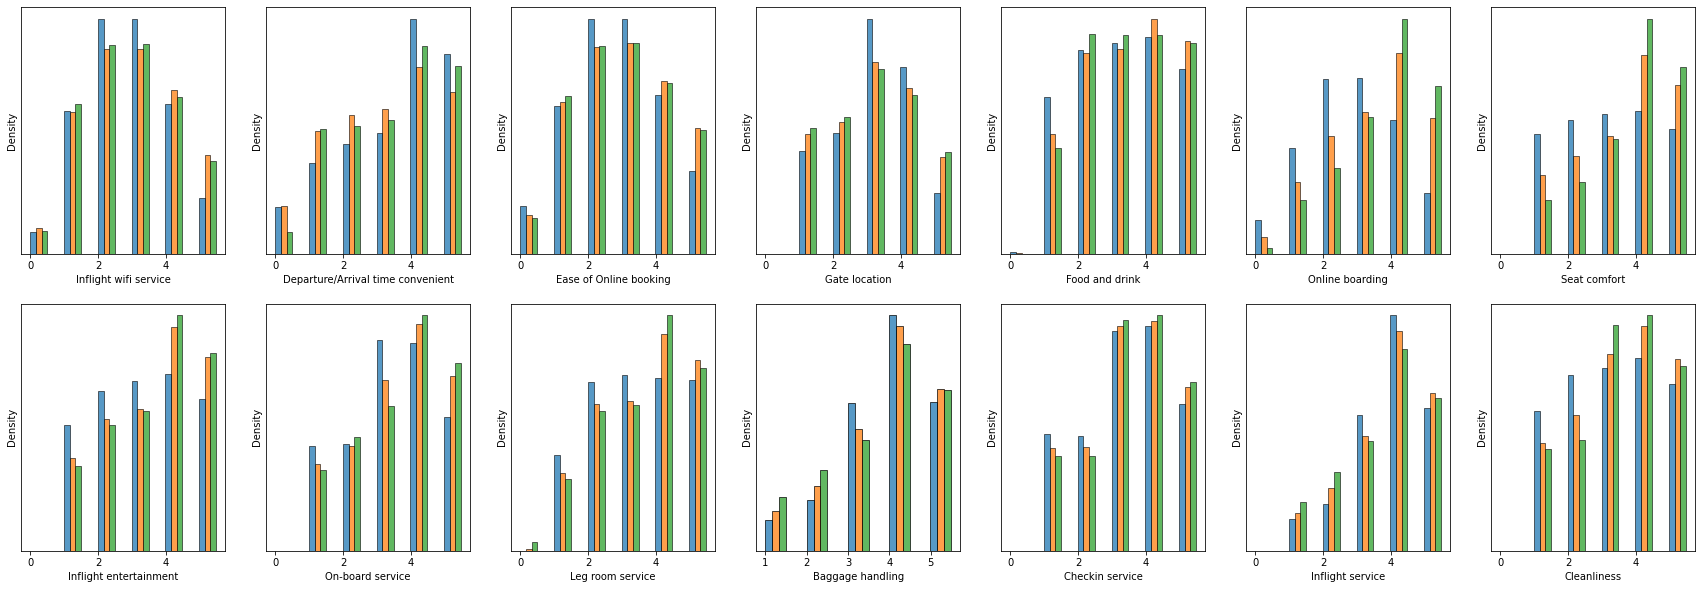

In [80]:
fig, ax = plt.subplots(2, 7, figsize=(30,10))
ax = ax.flatten()
for index, item in enumerate(my_list):
    sns.histplot(x=data_tr[item], hue=data_tr['Age_tag'], 
                 ax=ax[index], stat='density', multiple='dodge', 
                 binwidth=0.499,common_norm=False)
    ax[index].legend([],[], frameon=False)
    ax[index].set_yticks([])

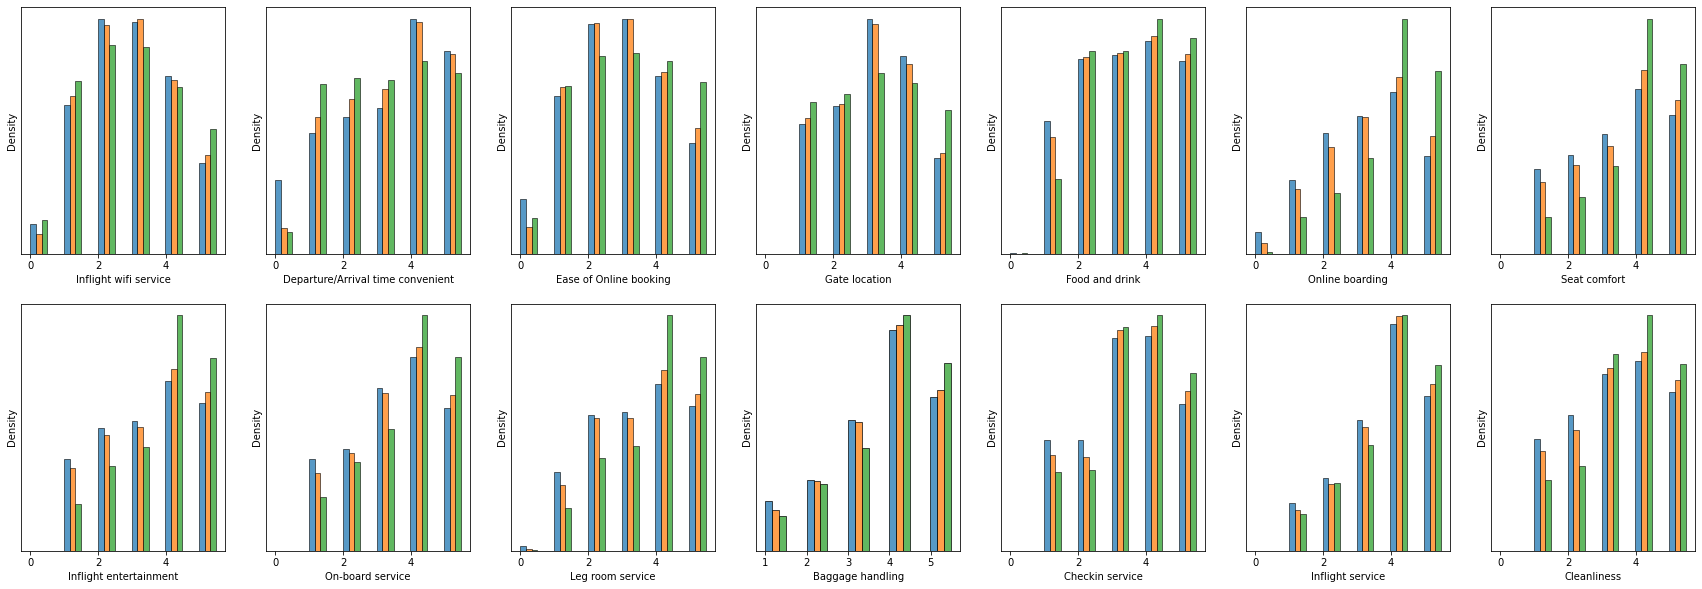

In [81]:
fig, ax = plt.subplots(2, 7, figsize=(30,10))
ax = ax.flatten()
for index, item in enumerate(my_list):
    sns.histplot(x=data_tr[item], hue=data_tr['Dis_tag'], 
                 ax=ax[index], stat='density', multiple='dodge', 
                 binwidth=0.499,common_norm=False)
    ax[index].legend([],[], frameon=False)             
    ax[index].set_yticks([])

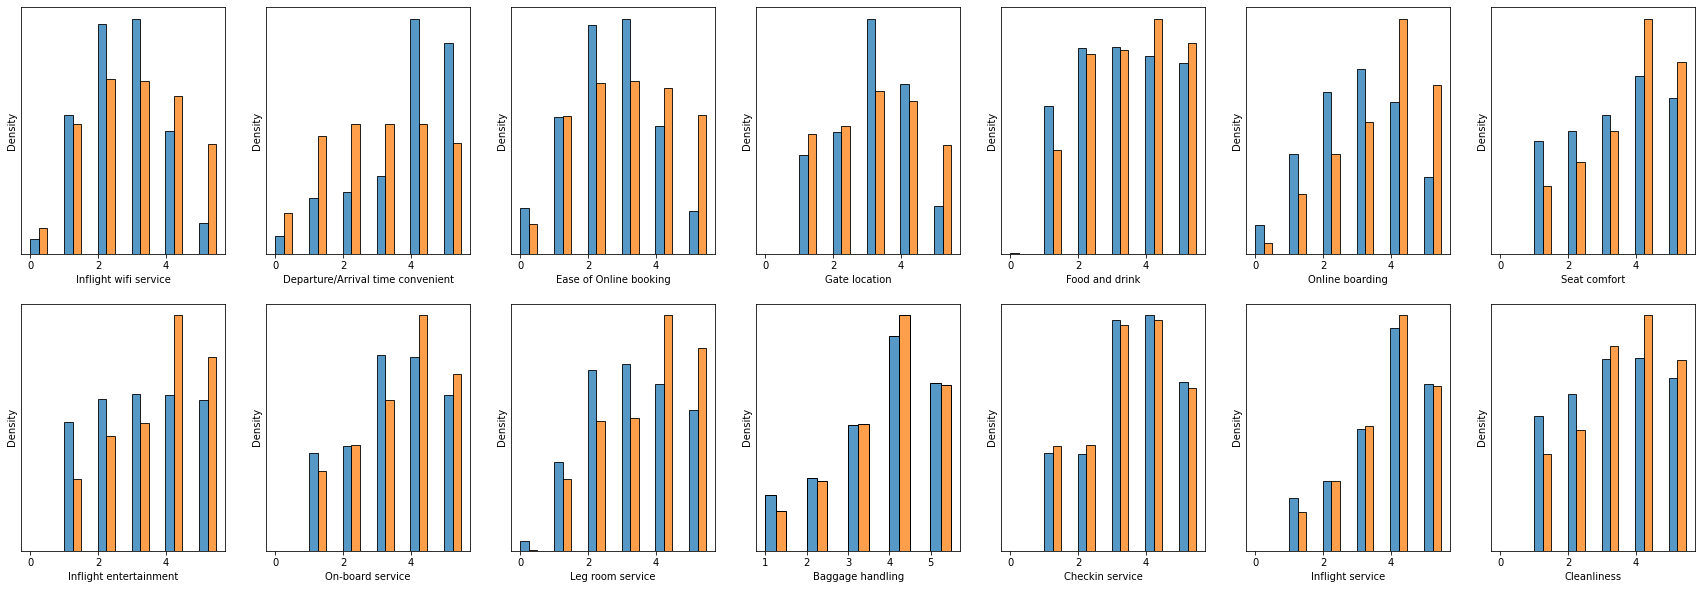

In [82]:
fig, ax = plt.subplots(2, 7, figsize=(30,10))
ax = ax.flatten()
for index, item in enumerate(my_list):
    sns.histplot(x=data_tr[item], hue=data_tr['Type of Travel'], 
                 ax=ax[index], stat='density', multiple='dodge', 
                 binwidth=0.499,common_norm=False)
    ax[index].legend([],[], frameon=False)
    ax[index].set_yticks([])

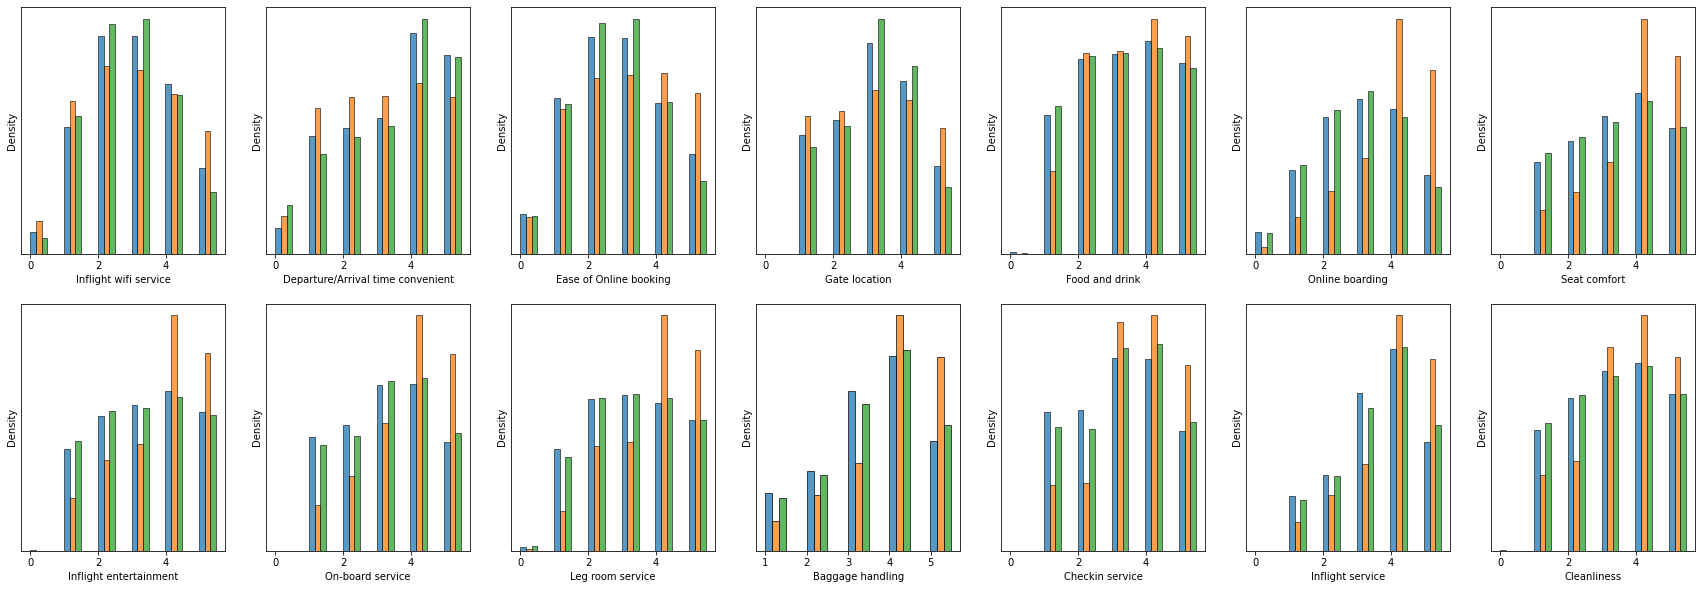

In [83]:
fig, ax = plt.subplots(2, 7, figsize=(30,10))
ax = ax.flatten()
for index, item in enumerate(my_list):
    sns.histplot(x=data_tr[item], hue=data_tr['Class'], 
                ax=ax[index], stat='density', multiple='dodge', 
                binwidth=0.499,common_norm=False)
    ax[index].legend([],[], frameon=False)
    ax[index].set_yticks([])

In [84]:
satis_tr = data_tr.iloc[:, 6:20]
satis_tr['Type'] = np.array(b)
satis_tr.groupby(['Type']).mean()

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
Type,,,,,,,,,,,,,,
Loyal Customer|Business travel|Business,2.759319,2.936709,2.934287,3.001922,3.386238,3.889471,3.918084,3.773575,3.701471,3.725738,3.800489,3.493072,3.802087,3.569720
Loyal Customer|Business travel|Eco,3.213871,2.966220,3.000211,3.030930,3.189908,3.190542,3.212182,3.258630,2.892431,3.063971,3.133115,2.763750,3.135226,3.128893
Loyal Customer|Business travel|Eco Plus,3.137855,2.927760,2.942587,2.993060,3.174132,3.127129,3.185174,3.231230,2.831546,3.027445,3.181703,2.718927,3.177287,3.117981
Loyal Customer|Personal Travel|Business,2.550982,3.627689,2.547240,2.929841,3.114593,3.241815,3.470065,3.015435,3.150140,2.848924,3.336763,3.332554,3.332554,3.229654
Loyal Customer|Personal Travel|Eco,2.521853,3.652288,2.475860,2.917921,3.071371,2.769043,3.171970,3.065160,3.280989,3.095606,3.596083,3.338871,3.619594,3.121709
Loyal Customer|Personal Travel|Eco Plus,2.502092,3.655788,2.458856,2.913250,3.095676,2.764017,3.217015,3.084798,3.296234,3.089540,3.569317,3.324965,3.620084,3.152859
disloyal Customer|Business travel|Business,2.927568,2.524758,2.911335,2.895921,3.039012,2.911335,2.988815,3.063429,3.715591,3.434047,4.221389,3.715319,4.225754,3.047742
disloyal Customer|Business travel|Eco,2.576102,2.289869,2.574238,3.053313,3.030944,2.591481,2.996458,3.037562,2.928139,3.080250,3.369559,2.906888,3.372915,3.056016
disloyal Customer|Business travel|Eco Plus,2.458392,2.282087,2.442877,3.122708,3.038082,2.471086,3.021157,3.036671,2.733427,3.070522,3.141044,2.788434,3.145275,3.077574


In [85]:
satis_tr.iloc[:, :-1].mean()

Inflight wifi service                2.729753
Departure/Arrival time convenient    3.060081
Ease of Online booking               2.756984
Gate location                        2.977026
Food and drink                       3.202126
Online boarding                      3.250497
Seat comfort                         3.439765
Inflight entertainment               3.358341
On-board service                     3.382609
Leg room service                     3.351401
Baggage handling                     3.631687
Checkin service                      3.304323
Inflight service                     3.640761
Cleanliness                          3.286397
dtype: float64

In [86]:
a = satis_tr.groupby(['Type']).mean() - satis_tr.iloc[:, :-1].mean()
np.argsort(a.iloc[0,:])

Inflight wifi service                 1
Departure/Arrival time convenient     3
Ease of Online booking                0
Gate location                        12
Food and drink                       10
Online boarding                       2
Seat comfort                          4
Inflight entertainment               11
On-board service                     13
Leg room service                      8
Baggage handling                      9
Checkin service                       7
Inflight service                      6
Cleanliness                           5
Name: Loyal Customer|Business travel|Business, dtype: int64

In [87]:
ranklist = []
for i in range(len(a)):
    ranklist.append(list(a.iloc[i,:].sort_values()[:3].index))

result = pd.DataFrame(ranklist, index=a.index, columns=['First', 'Second', 'Third'])
result

,First,Second,Third
Type,,,
Loyal Customer|Business travel|Business,Departure/Arrival time convenient,Gate location,Inflight wifi service
Loyal Customer|Business travel|Eco,Checkin service,Inflight service,Baggage handling
Loyal Customer|Business travel|Eco Plus,Checkin service,On-board service,Inflight service
Loyal Customer|Personal Travel|Business,Leg room service,Inflight entertainment,Inflight service
Loyal Customer|Personal Travel|Eco,Online boarding,Inflight entertainment,Ease of Online booking
Loyal Customer|Personal Travel|Eco Plus,Online boarding,Ease of Online booking,Inflight entertainment
disloyal Customer|Business travel|Business,Departure/Arrival time convenient,Seat comfort,Online boarding
disloyal Customer|Business travel|Eco,Departure/Arrival time convenient,Online boarding,On-board service
disloyal Customer|Business travel|Eco Plus,Online boarding,Departure/Arrival time convenient,On-board service
